In [106]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [107]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [108]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df['Yearday'] = df['Date'].dt.dayofyear
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index','Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday,Yearday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2,305
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2,305
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2,305
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2,305
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2,305


In [109]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]
df1 = df.copy(deep=True)
better = df1.TLCompany.unique()
bet_dict = dict(zip(better, range(len(better))))
df1 = df1.replace({'TLCompany': bet_dict})
df1 = df1.replace({'BLCompany': bet_dict})
#try betting dummification
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,5,0,4,1,4,2006,11,44,2,305,4.75,9
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,7,1,7,1,4,2006,11,44,2,305,7.00,10
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,5,2,4,3,4,2006,11,44,2,305,4.75,-1
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,-1,1,-2,2,4,2006,11,44,2,305,-1.25,15
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,6,2,6,2,4,2006,11,44,2,305,6.00,3


In [111]:
df2 = df1[(df1['HomeTeam'] == 'GSW') | (df1['AwayTeam'] == 'GSW')]
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,GSW,LAL,0.0,1.0,0.0,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.00,-12
22,GSW,POR,1.0,1.0,0.5,1.0,1.0,0.500,9,3,9,3,4,2006,11,44,4,307,9.00,13
29,UTA,GSW,3.0,0.0,1.0,1.0,2.0,0.333,6,2,6,2,4,2006,11,44,5,308,6.00,24
40,DAL,GSW,0.0,3.0,0.0,2.0,2.0,0.500,10,2,9,1,4,2006,11,45,0,310,9.25,-3
49,NOK,GSW,4.0,0.0,1.0,2.0,3.0,0.400,7,1,7,1,4,2006,11,45,1,311,7.00,4


In [112]:
team = df2.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df2 = df2.replace({'HomeTeam': team_dict})
df2 = df2.replace({'AwayTeam': team_dict})
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,0,16,0.0,1.0,0.0,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.00,-12
22,0,28,1.0,1.0,0.5,1.0,1.0,0.500,9,3,9,3,4,2006,11,44,4,307,9.00,13
29,1,0,3.0,0.0,1.0,1.0,2.0,0.333,6,2,6,2,4,2006,11,44,5,308,6.00,24
40,2,0,0.0,3.0,0.0,2.0,2.0,0.500,10,2,9,1,4,2006,11,45,0,310,9.25,-3
49,3,0,4.0,0.0,1.0,2.0,3.0,0.400,7,1,7,1,4,2006,11,45,1,311,7.00,4


In [113]:
print (len(df2))
df2['AwayTeam'] = pd.to_numeric(df2['AwayTeam'], errors='coerce')
df2 = df2.dropna()
print (len(df2))

1044
1044


In [34]:
#Look if team is marked as 0 or 1

df2.loc[df2['HomeTeam'] == 0, 'HomeCourt'] = 1
df2.loc[df2['HomeTeam'] != 0, 'HomeCourt'] = 0
df2['Opponent'] = df2['HomeTeam'] + df2['AwayTeam'] - 0
df2.loc[df2['HomeCourt'] == 1, 'OppWin'] = df2['ATWin']
df2.loc[df2['HomeCourt'] != 1, 'OppWin'] = df2['HTWin']
df2.loc[df2['HomeCourt'] == 1, 'Win'] = df2['HTWin']
df2.loc[df2['HomeCourt'] != 1, 'Win'] = df2['ATWin']
df2.loc[df2['HomeCourt'] == 1, 'OppLoss'] = df2['ATLoss']
df2.loc[df2['HomeCourt'] != 1, 'OppLoss'] = df2['HTLoss']
df2.loc[df2['HomeCourt'] == 1, 'Loss'] = df2['HTLoss']
df2.loc[df2['HomeCourt'] != 1, 'Loss'] = df2['ATLoss']
df2.loc[df2['HomeCourt'] == 1, 'Opp%'] = df2['AT%']
df2.loc[df2['HomeCourt'] != 1, 'Opp%'] = df2['HT%']
df2.loc[df2['HomeCourt'] == 1, 'Own%'] = df2['HT%']
df2.loc[df2['HomeCourt'] != 1, 'Own%'] = df2['AT%']
df2.loc[df2['HomeCourt'] == 1, 'average'] = df2['average']
df2.loc[df2['HomeCourt'] != 1, 'average'] = -1*df2['average']
df2.loc[df2['HomeCourt'] == 1, 'WinMargin'] = df2['WinMargin']
df2.loc[df2['HomeCourt'] != 1, 'WinMargin'] = -1*df2['WinMargin']

df2.loc[df2['WinMargin'] < 0, 'OppWin'] = df2['OppWin']-1
df2.loc[df2['WinMargin'] >= 0, 'OppLoss'] = df2['OppLoss']-1
df2.loc[df2['WinMargin'] < 0, 'Loss'] = df2['Loss']-1
df2.loc[df2['WinMargin'] >= 0, 'Win'] = df2['Win']-1
df2['Opp%'] = df2['OppWin']/(df2['OppWin'] + df2['OppLoss'])
df2['Own%'] = df2['Win']/(df2['Win'] + df2['Loss'])

df2 = df2.drop(['HomeTeam','AwayTeam','HTWin','HTLoss','HT%','ATWin','ATLoss','AT%'], axis=1)

In [114]:
df2 = df2.fillna(0)
#df2['Rest'] = df2['Yearday'].diff()%365
#df2['PrevMargin'] = df2['WinMargin'].shift(1)
#df2 = df2[df2['Rest'] < 20]
#df = df.drop(['Yearday'], axis=1)
df2 = df2.dropna()
cols_at_end = ['WinMargin']
df2 = df2[[c for c in df2 if c not in cols_at_end] + [c for c in cols_at_end if c in df2]]
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,0,16,0.0,1.0,0.0,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.00,-12
22,0,28,1.0,1.0,0.5,1.0,1.0,0.500,9,3,9,3,4,2006,11,44,4,307,9.00,13
29,1,0,3.0,0.0,1.0,1.0,2.0,0.333,6,2,6,2,4,2006,11,44,5,308,6.00,24
40,2,0,0.0,3.0,0.0,2.0,2.0,0.500,10,2,9,1,4,2006,11,45,0,310,9.25,-3
49,3,0,4.0,0.0,1.0,2.0,3.0,0.400,7,1,7,1,4,2006,11,45,1,311,7.00,4


In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
0,-0.754126,0.838144,-1.270301,-1.167608,-2.472148,-1.176756,-1.211390,2.082035,0.445730,-0.339009,0.534635,-0.401175,-2.847639,-1.820956,1.27878,1.169285,-0.489923,1.166256,0.493870,-1.103368
1,-0.754126,2.040648,-1.209391,-1.167608,-0.223288,-1.240141,-1.140792,-0.160163,0.710354,0.110135,0.794910,0.084703,-2.847639,-1.820956,1.27878,1.169285,0.524917,1.181653,0.759394,0.610181
2,-0.653589,-0.765195,-1.087571,-1.241396,2.025573,-1.240141,-1.070194,-0.909057,0.313417,-0.339009,0.404498,-0.401175,-2.847639,-1.820956,1.27878,1.169285,1.032338,1.189352,0.361108,1.364143
3,-0.553052,-0.765195,-1.270301,-1.020032,-2.472148,-1.176756,-1.070194,-0.160163,0.842666,-0.339009,0.794910,-0.887054,-2.847639,-1.820956,1.27878,1.223209,-1.504763,1.204749,0.792585,-0.486491
4,-0.452514,-0.765195,-1.026661,-1.241396,2.025573,-1.176756,-0.999596,-0.608602,0.445730,-0.788153,0.534635,-0.887054,-2.847639,-1.820956,1.27878,1.223209,-0.997343,1.212448,0.493870,-0.006697


In [116]:
df3 = df2.copy(deep=True)
#df3 = df3.drop(['Year'], axis=1)

In [117]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [19], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [19], axis=1)
test_x=tests[0]
test_y=tests[1]

In [118]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [119]:
train_y.head()

,WinMargin
0,-1.103368
1,0.610181
2,1.364143
3,-0.486491
4,-0.006697


## Correlation Marix

AxesSubplot(0.127273,0.125;0.617727x0.755)


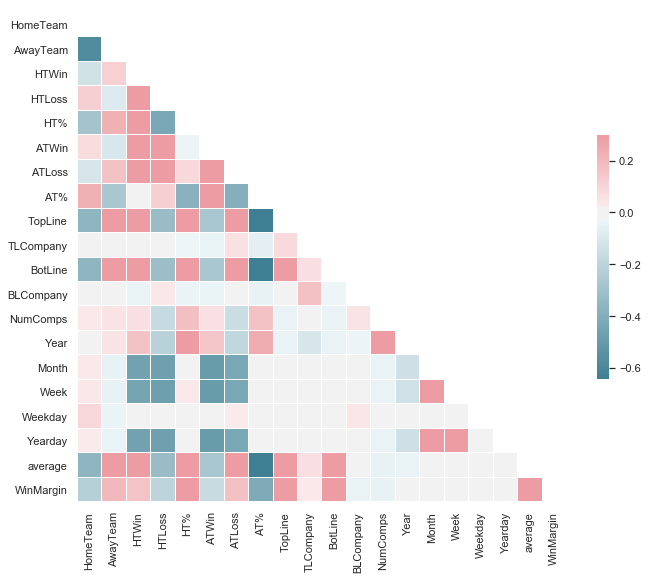

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([[-0.04379613,  0.00048816,  0.12971154,  0.08708303,  0.19682647,
        -0.09264224, -0.12954035, -0.17332366,  0.09722783,  0.02117691,
        -0.09943166, -0.03108391, -0.02614141, -0.04365178,  0.1006132 ,
        -0.0356701 , -0.00984325, -0.07114613,  0.26754195]])

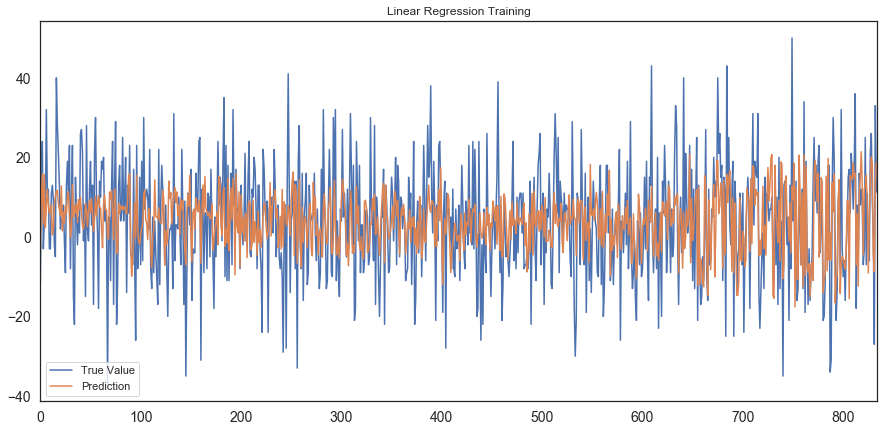

adj train r^2 = 0.252451976856246
train mse = 140.0982889997884


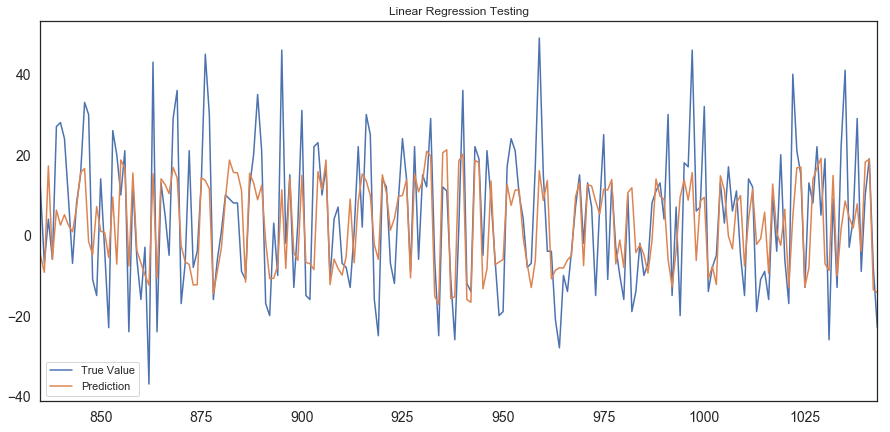

adj test r^2 = 0.3685333799918974
test mse = 183.16366441757447


In [122]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [123]:
from sklearn.metrics import accuracy_score
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 74.25%
The testing accuracy is 80.38%


## Naive Model

In [62]:
one = (len(train_y3[train_y3['Over']>.5]) + len(test_y3[test_y3['Over']>.5])) / (len(train_y3) + len(test_y3)) * 100
zero = (len(train_y3[train_y3['Over']<.5]) + len(test_y3[test_y3['Over']<.5])) / (len(train_y3) + len(test_y3)) * 100

In [63]:
print('Always picking over the line works ' + str(round(one,2)) + '% of the time')
print('Always picking under the line works ' + str(round(zero,2)) + '% of the time')

Always picking over the line works 61.02% of the time
Always picking under the line works 38.98% of the time


## Extra Trees

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

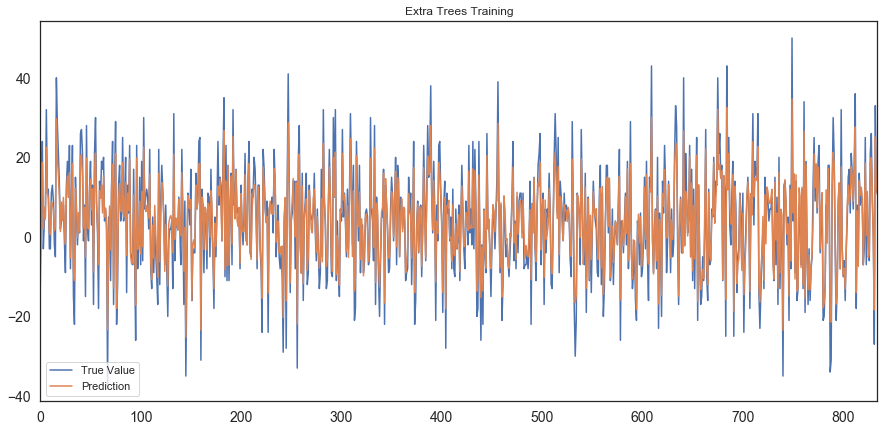

adj train r^2 = 0.8886111511862983
train mse = 20.875430941317315


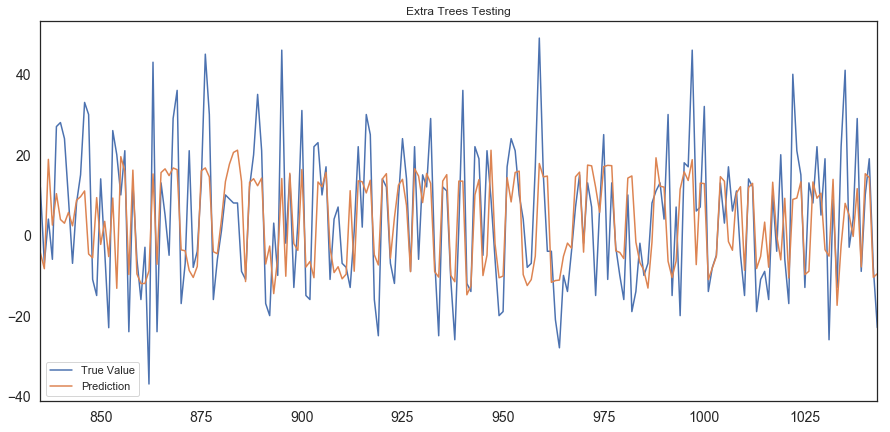

adj test r^2 = 0.33177250934743296
test mse = 193.826549138756


In [65]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [66]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 94.37%
The testing accuracy is 79.9%


## Random Forrest

In [67]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.WinMargin.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

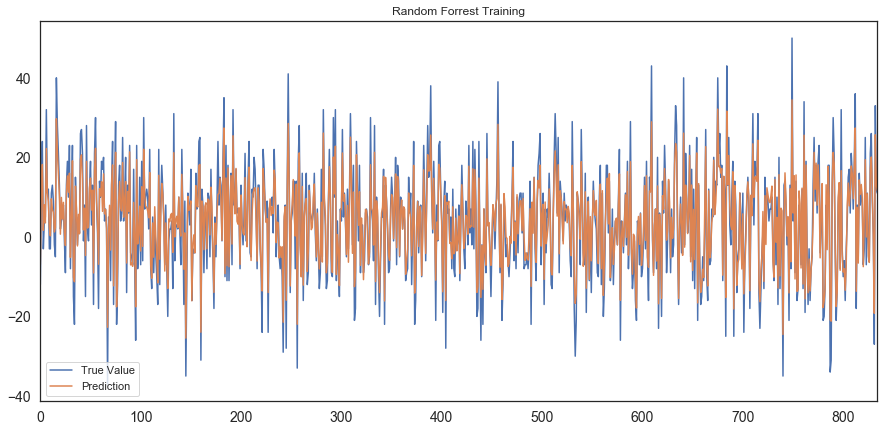

adj train r^2 = 0.8862443759489418
train mse = 21.318989282634682


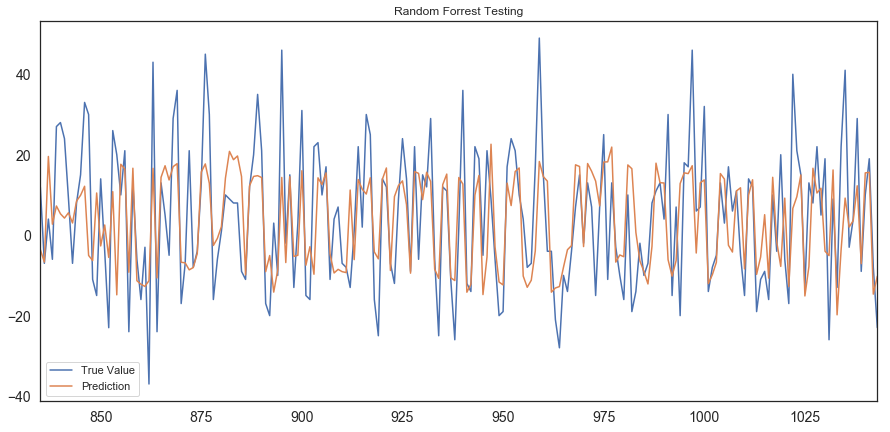

adj test r^2 = 0.3286474170351229
test mse = 194.73301567464122


In [68]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [69]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 94.73%
The testing accuracy is 78.95%


## XGBoost

In [70]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [71]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.003)
reg.fit(train_x.values, train_y.WinMargin.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.003, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

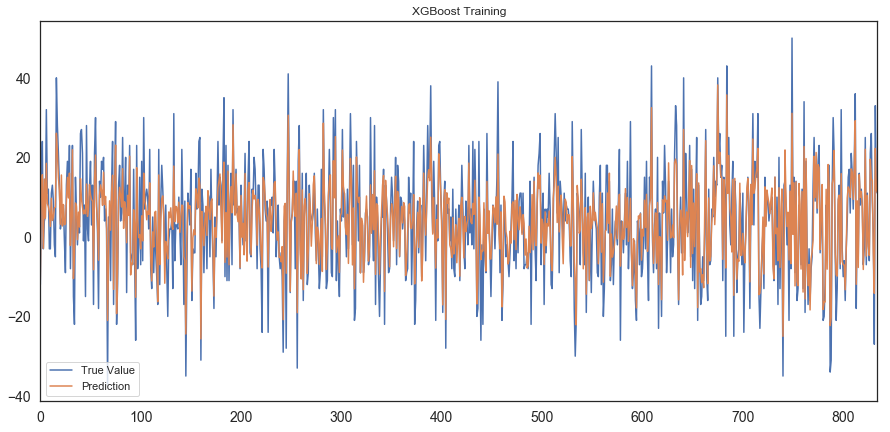

adj train r^2 = 0.7515298525491818
train mse = 46.565894695290666


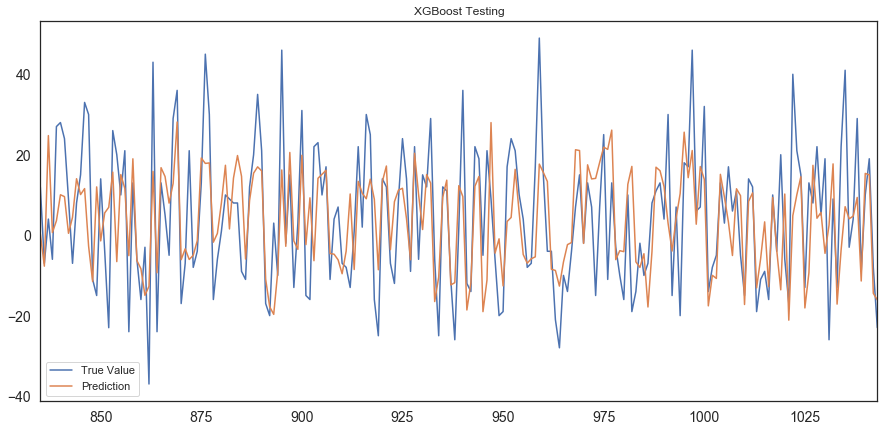

adj test r^2 = 0.3026199437432563
test mse = 202.28256339833192


In [72]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [73]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 88.62%
The testing accuracy is 77.51%


## Feed Forward Neural Network

In [74]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [75]:
K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=19, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.WinMargin.values.ravel(), validation_data=[test_x.values, test_y['WinMargin'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 835 samples, validate on 209 samples
Epoch 1/500
835/835 [==============================] - 1s 2ms/step - loss: 1.2632 - val_loss: 1.3578
Epoch 2/500
835/835 [==============================] - 0s 50us/step - loss: 0.7643 - val_loss: 1.0186
Epoch 3/500
835/835 [==============================] - 0s 48us/step - loss: 0.6928 - val_loss: 1.0189
Epoch 4/500
835/835 [==============================] - 0s 59us/step - loss: 0.6725 - val_loss: 1.0083
Epoch 5/500
835/835 [==============================] - 0s 66us/step - loss: 0.6618 - val_loss: 1.0014
Epoch 6/500
835/835 [==============================] - 0s 70us/step - loss: 0.6540 - val_loss: 0.9971
Epoch 7/500
835/835 [==============================] - 0s 78us/step - loss: 0.6476 - val_loss: 0.9928
Epoch 8/500
835/835 [==============================] - 0s 77us/step - loss: 0.6416 - val_loss: 0.9888
Epoch 9/500
835/835

Epoch 75/500
835/835 [==============================] - 0s 43us/step - loss: 0.4875 - val_loss: 0.9774
Epoch 76/500
835/835 [==============================] - 0s 43us/step - loss: 0.4867 - val_loss: 0.9818
Epoch 77/500
835/835 [==============================] - 0s 45us/step - loss: 0.4849 - val_loss: 0.9798
Epoch 78/500
835/835 [==============================] - 0s 43us/step - loss: 0.4835 - val_loss: 0.9832
Epoch 79/500
835/835 [==============================] - 0s 43us/step - loss: 0.4818 - val_loss: 0.9817
Epoch 80/500
835/835 [==============================] - 0s 43us/step - loss: 0.4807 - val_loss: 0.9853
Epoch 81/500
835/835 [==============================] - 0s 43us/step - loss: 0.4788 - val_loss: 0.9840
Epoch 82/500
835/835 [==============================] - 0s 44us/step - loss: 0.4779 - val_loss: 0.9874
Epoch 83/500
835/835 [==============================] - 0s 44us/step - loss: 0.4762 - val_loss: 0.9858
Epoch 84/500
835/835 [==============================] - 0s 47us/step - lo

835/835 [==============================] - 0s 80us/step - loss: 0.3808 - val_loss: 1.0665
Epoch 155/500
835/835 [==============================] - 0s 73us/step - loss: 0.3808 - val_loss: 1.0661
Epoch 156/500
835/835 [==============================] - 0s 68us/step - loss: 0.3787 - val_loss: 1.0696
Epoch 157/500
835/835 [==============================] - 0s 69us/step - loss: 0.3784 - val_loss: 1.0702
Epoch 158/500
835/835 [==============================] - 0s 69us/step - loss: 0.3762 - val_loss: 1.0718
Epoch 159/500
835/835 [==============================] - 0s 55us/step - loss: 0.3756 - val_loss: 1.0714
Epoch 160/500
835/835 [==============================] - 0s 54us/step - loss: 0.3734 - val_loss: 1.0740
Epoch 161/500
835/835 [==============================] - 0s 52us/step - loss: 0.3726 - val_loss: 1.0740
Epoch 162/500
835/835 [==============================] - 0s 51us/step - loss: 0.3704 - val_loss: 1.0758
Epoch 163/500
835/835 [==============================] - 0s 46us/step - loss: 

Epoch 233/500
835/835 [==============================] - 0s 45us/step - loss: 0.3109 - val_loss: 1.1490
Epoch 234/500
835/835 [==============================] - 0s 45us/step - loss: 0.3037 - val_loss: 1.1491
Epoch 235/500
835/835 [==============================] - 0s 44us/step - loss: 0.2994 - val_loss: 1.1513
Epoch 236/500
835/835 [==============================] - 0s 45us/step - loss: 0.3018 - val_loss: 1.1524
Epoch 237/500
835/835 [==============================] - 0s 44us/step - loss: 0.3056 - val_loss: 1.1540
Epoch 238/500
835/835 [==============================] - 0s 44us/step - loss: 0.3070 - val_loss: 1.1551
Epoch 239/500
835/835 [==============================] - 0s 44us/step - loss: 0.2971 - val_loss: 1.1562
Epoch 240/500
835/835 [==============================] - 0s 46us/step - loss: 0.2952 - val_loss: 1.1586
Epoch 241/500
835/835 [==============================] - 0s 45us/step - loss: 0.3038 - val_loss: 1.1606
Epoch 242/500
835/835 [==============================] - 0s 44us

Epoch 312/500
835/835 [==============================] - 0s 62us/step - loss: 0.2447 - val_loss: 1.2406
Epoch 313/500
835/835 [==============================] - 0s 63us/step - loss: 0.2471 - val_loss: 1.2450
Epoch 314/500
835/835 [==============================] - 0s 63us/step - loss: 0.2562 - val_loss: 1.2431
Epoch 315/500
835/835 [==============================] - 0s 64us/step - loss: 0.2456 - val_loss: 1.2437
Epoch 316/500
835/835 [==============================] - 0s 61us/step - loss: 0.2429 - val_loss: 1.2462
Epoch 317/500
835/835 [==============================] - 0s 47us/step - loss: 0.2540 - val_loss: 1.2433
Epoch 318/500
835/835 [==============================] - 0s 45us/step - loss: 0.2482 - val_loss: 1.2522
Epoch 319/500
835/835 [==============================] - 0s 45us/step - loss: 0.2411 - val_loss: 1.2505
Epoch 320/500
835/835 [==============================] - 0s 44us/step - loss: 0.2501 - val_loss: 1.2473
Epoch 321/500
835/835 [==============================] - 0s 43us

Epoch 391/500
835/835 [==============================] - 0s 49us/step - loss: 0.2161 - val_loss: 1.3245
Epoch 392/500
835/835 [==============================] - 0s 45us/step - loss: 0.2126 - val_loss: 1.3494
Epoch 393/500
835/835 [==============================] - 0s 47us/step - loss: 0.2010 - val_loss: 1.3497
Epoch 394/500
835/835 [==============================] - 0s 45us/step - loss: 0.2147 - val_loss: 1.3259
Epoch 395/500
835/835 [==============================] - 0s 45us/step - loss: 0.2110 - val_loss: 1.3421
Epoch 396/500
835/835 [==============================] - 0s 45us/step - loss: 0.2005 - val_loss: 1.3541
Epoch 397/500
835/835 [==============================] - 0s 47us/step - loss: 0.2180 - val_loss: 1.3389
Epoch 398/500
835/835 [==============================] - 0s 46us/step - loss: 0.2045 - val_loss: 1.3548
Epoch 399/500
835/835 [==============================] - 0s 44us/step - loss: 0.1996 - val_loss: 1.3592
Epoch 400/500
835/835 [==============================] - 0s 46us

835/835 [==============================] - 0s 58us/step - loss: 0.1916 - val_loss: 1.3875
Epoch 470/500
835/835 [==============================] - 0s 89us/step - loss: 0.1831 - val_loss: 1.3623
Epoch 471/500
835/835 [==============================] - 0s 68us/step - loss: 0.1879 - val_loss: 1.4148
Epoch 472/500
835/835 [==============================] - 0s 67us/step - loss: 0.1836 - val_loss: 1.4218
Epoch 473/500
835/835 [==============================] - 0s 57us/step - loss: 0.1829 - val_loss: 1.3712
Epoch 474/500
835/835 [==============================] - 0s 61us/step - loss: 0.1804 - val_loss: 1.3783
Epoch 475/500
835/835 [==============================] - 0s 63us/step - loss: 0.1802 - val_loss: 1.4311
Epoch 476/500
835/835 [==============================] - 0s 56us/step - loss: 0.1804 - val_loss: 1.4030
Epoch 477/500
835/835 [==============================] - 0s 49us/step - loss: 0.1762 - val_loss: 1.3702
Epoch 478/500
835/835 [==============================] - 0s 52us/step - loss: 

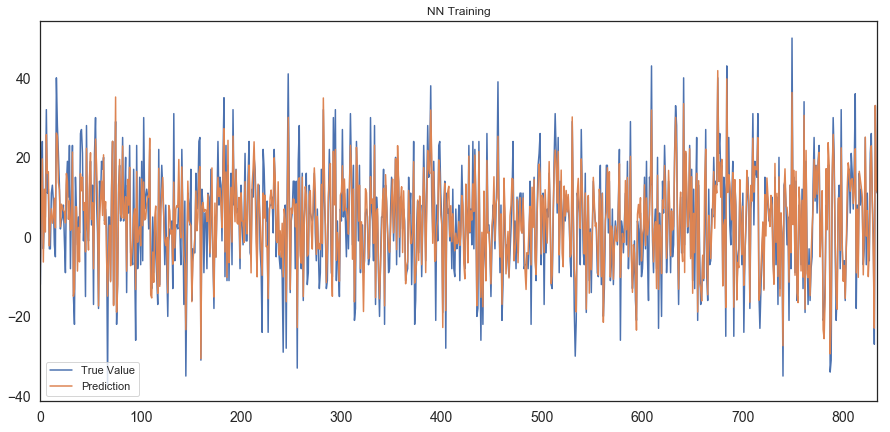

adj train r^2 = 0.8205270040898549
train mse = 33.635109545119036


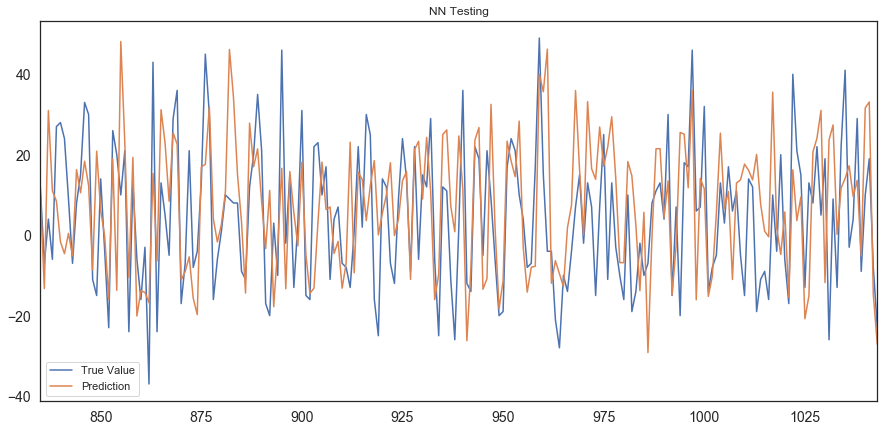

adj test r^2 = -0.046599960719125644
test mse = 303.5775414100982


In [76]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [77]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 88.98%
The testing accuracy is 71.77%


## LSTM

In [78]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [79]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.WinMargin.values.ravel(), validation_data=[X_tst_t, test_y['WinMargin'].values.ravel()], epochs=40, verbose=1, shuffle=False)

Train on 835 samples, validate on 209 samples
Epoch 1/40
835/835 [==============================] - 6s 7ms/step - loss: 0.7503 - val_loss: 0.8653
Epoch 2/40
835/835 [==============================] - 2s 3ms/step - loss: 0.7328 - val_loss: 0.8969
Epoch 3/40
835/835 [==============================] - 2s 3ms/step - loss: 0.6975 - val_loss: 0.9217
Epoch 4/40
835/835 [==============================] - 2s 3ms/step - loss: 0.6853 - val_loss: 0.9265
Epoch 5/40
835/835 [==============================] - 2s 3ms/step - loss: 0.6792 - val_loss: 0.9388
Epoch 6/40
835/835 [==============================] - 2s 2ms/step - loss: 0.6977 - val_loss: 0.9516
Epoch 7/40
835/835 [==============================] - 2s 2ms/step - loss: 0.6862 - val_loss: 0.9595
Epoch 8/40
835/835 [==============================] - 2s 2ms/step - loss: 0.6949 - val_loss: 0.9662
Epoch 9/40
835/835 [==============================] - 2s 3ms/step - loss: 0.6743 - val_loss: 0.9686
Epoch 10/40
835/835 [==============================] -

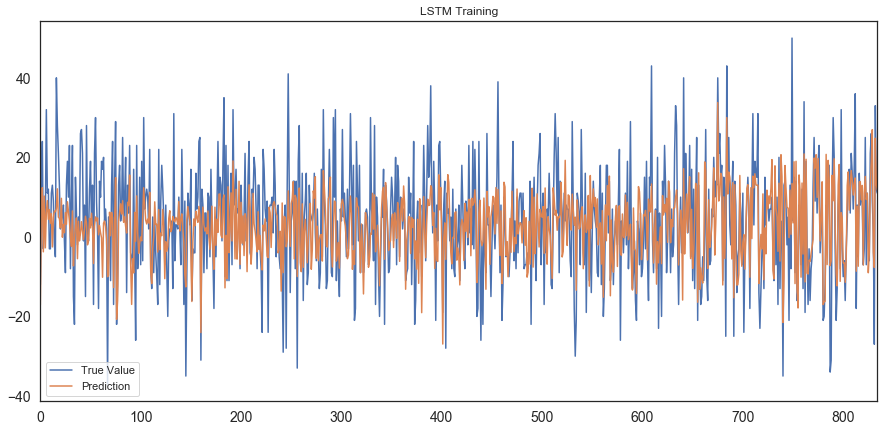

adj train r^2 = 0.3738829800244028
train mse = 117.3408536930333


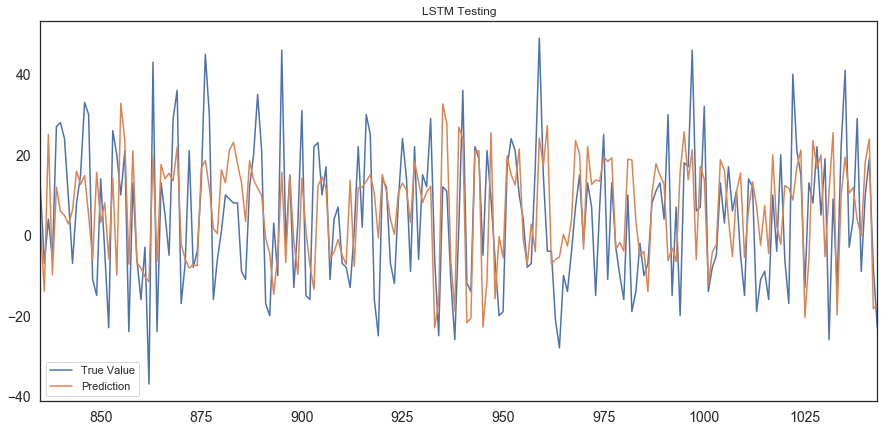

adj test r^2 = 0.20435215961119435
test mse = 230.78618792181453


In [80]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [81]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 79.04%
The testing accuracy is 75.12%


## TPOT

In [82]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(population_size=5, max_time_mins=2, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.WinMargin.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Generation 1 - Current best internal CV score: -0.6809274044709822
Generation 2 - Current best internal CV score: -0.6809274044709822
Generation 3 - Current best internal CV score: -0.6809274044709822
Generation 4 - Current best internal CV score: -0.6732402436677458
Generation 5 - Current best internal CV score: -0.6732402436677458
Generation 6 - Current best internal CV score: -0.6732402436677458
Generation 7 - Current best internal CV score: -0.6732402436677458
Generation 8 - Current best internal CV score: -0.6698454197221152
Generation 9 - Current best internal CV score: -0.6698454197221152
Generation 10 - Current best internal CV score: -0.6698454197221152
Generation 11 - Current best internal CV score: -0.6697173337318463
Generation 12 - Current best internal CV score: -0.6697173337318463
Generation 13 - Current best internal CV score: -0.6697173337318463
Generation 14 - Current best internal CV score: -0.6697173337318463
Generation 15 - Current best internal CV score: -0.669717

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=2,
       warm_start=False)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validat

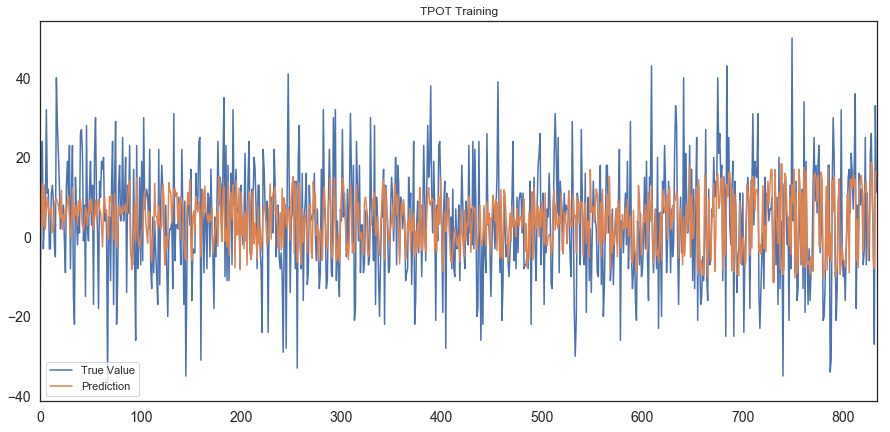

adj train r^2 = 0.25547030175628904
train mse = 139.5326234625254


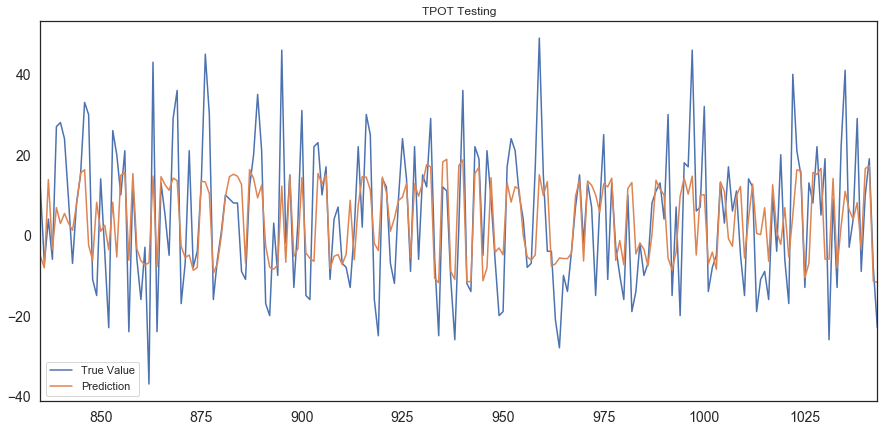

adj test r^2 = 0.3556855322812167
test mse = 186.89032041490495


In [83]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [84]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 74.61%
The testing accuracy is 80.38%
